## 텐서플로 시작하기

#### 상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**랜덤 텐서**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.54463184]
 [ 2.5750756 ]
 [-1.0144601 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.593027  ]
 [0.36654973]
 [0.22619963]], shape=(3, 1), dtype=float32)


**넘파이 배열에 값 할당하기**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**텐서플로 변수 만들기**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.0880525 ],
       [ 1.6128163 ],
       [-0.43440977]], dtype=float32)>


**텐서플로 변수에 값 할당하기**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**변수 일부에 값 할당하기**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**`assign_add` 사용하기**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 텐서 연산: 텐서플로에서 수학 계산하기

**기본적인 수학 연산**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### GradientTape API 다시 살펴 보기

**`GradientTape` 사용하기**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**상수 입력 텐서와 함께 `GradientTape` 사용하기**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### 엔드-투-엔드 예제: 텐서플로 선형 분류기

**2D 평면에 두 클래스의 랜덤한 포인트 생성하기**

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**(0과 1로 구성된) 타깃 생성하기**

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**두 클래스의 포인트를 그래프로 그리기**

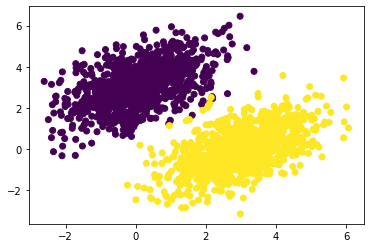

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**선형 분류기의 변수 만들기**

In [18]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**정방향 패스 함수**

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**평균 제곱 오차 손실 함수**

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**훈련 스텝 함수**

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**배치 훈련 루프**

In [22]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 0.6444
1번째 스텝의 손실: 0.1950
2번째 스텝의 손실: 0.1152
3번째 스텝의 손실: 0.0961
4번째 스텝의 손실: 0.0879
5번째 스텝의 손실: 0.0820
6번째 스텝의 손실: 0.0769
7번째 스텝의 손실: 0.0723
8번째 스텝의 손실: 0.0681
9번째 스텝의 손실: 0.0643
10번째 스텝의 손실: 0.0608
11번째 스텝의 손실: 0.0576
12번째 스텝의 손실: 0.0547
13번째 스텝의 손실: 0.0521
14번째 스텝의 손실: 0.0497
15번째 스텝의 손실: 0.0475
16번째 스텝의 손실: 0.0455
17번째 스텝의 손실: 0.0437
18번째 스텝의 손실: 0.0421
19번째 스텝의 손실: 0.0405
20번째 스텝의 손실: 0.0392
21번째 스텝의 손실: 0.0379
22번째 스텝의 손실: 0.0368
23번째 스텝의 손실: 0.0357
24번째 스텝의 손실: 0.0348
25번째 스텝의 손실: 0.0339
26번째 스텝의 손실: 0.0331
27번째 스텝의 손실: 0.0324
28번째 스텝의 손실: 0.0318
29번째 스텝의 손실: 0.0312
30번째 스텝의 손실: 0.0306
31번째 스텝의 손실: 0.0301
32번째 스텝의 손실: 0.0297
33번째 스텝의 손실: 0.0293
34번째 스텝의 손실: 0.0289
35번째 스텝의 손실: 0.0285
36번째 스텝의 손실: 0.0282
37번째 스텝의 손실: 0.0280
38번째 스텝의 손실: 0.0277
39번째 스텝의 손실: 0.0275


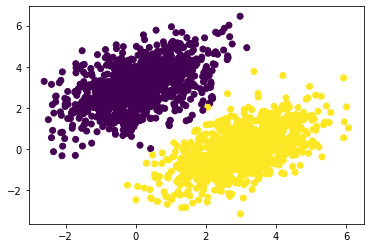

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

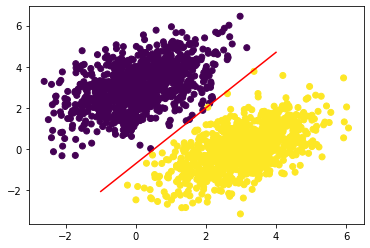

In [24]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 신경망의 구조: 핵심 Keras API 이해하기

#### 케라스의 Layer 클래스

**`Layer`의 서브클래스로 구현한 `Dense` 층**

In [25]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [26]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기

In [27]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [29]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### 층에서 모델로

### “컴파일” 단계: 학습 과정 설정

In [30]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 손실 함수 선택하기

### fit() 메서드 이해하기

**넘파이 데이터로 `fit()` 메서드 호출하기**

In [32]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 4.8037 - binary_accuracy: 0.2855
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 4.5649 - binary_accuracy: 0.2770
Epoch 3/5
16/16 [==============================] - 0s 941us/step - loss: 4.3659 - binary_accuracy: 0.2690
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 4.1781 - binary_accuracy: 0.2620
Epoch 5/5
16/16 [==============================] - 0s 943us/step - loss: 3.9986 - binary_accuracy: 0.2570


In [33]:
history.history

{'loss': [4.803735256195068,
  4.564901351928711,
  4.365914344787598,
  4.178144454956055,
  3.9986109733581543],
 'binary_accuracy': [0.2854999899864197,
  0.2770000100135803,
  0.26899999380111694,
  0.2619999945163727,
  0.25699999928474426]}

### 검증 데이터에서 손실과 측정 지표 모니터링하기

**`validation_data` 매개변수 사용하기**

In [34]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.5319 - binary_accuracy: 0.8686 - val_loss: 0.1082 - val_binary_accuracy: 0.9817
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0725 - binary_accuracy: 0.9664 - val_loss: 0.1203 - val_binary_accuracy: 0.9650
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0762 - binary_accuracy: 0.9614 - val_loss: 0.0447 - val_binary_accuracy: 0.9950
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0727 - binary_accuracy: 0.9664 - val_loss: 0.0304 - val_binary_accuracy: 0.9950
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0735 - binary_accuracy: 0.9614 - val_loss: 0.0715 - val_binary_accuracy: 0.9467


### 추론: 훈련한 모델 사용하기

In [35]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[1.0242702 ]
 [0.6746298 ]
 [0.95820177]
 [0.3530385 ]
 [0.3601802 ]
 [0.2540819 ]
 [0.83750343]
 [0.90642357]
 [0.31484678]
 [0.20857874]]


## 요약